Iteration 1:
  b0 = 0.0, b1 = 0.0125, b2 = 0.0008499999999999996
  z for input [1.9, 3.1] = 0.026385
  Probability for input [1.9, 3.1] = 0.5065958673516676
  Cost = 0.678079704151424
--------------------------------------------------
Iteration 2:
  b0 = -0.00015661634754812227, b1 = 0.024021801361985742, b2 = 0.0012724026836250474
  z for input [1.9, 3.1] = 0.049429254559462434
  Probability for input [1.9, 3.1] = 0.5123547982526481
  Cost = 0.6653011684913138
--------------------------------------------------
Iteration 3:
  b0 = -0.00045440552113561807, b1 = 0.03465932718896505, b2 = 0.001309331669480201
  z for input [1.9, 3.1] = 0.0694572443132866
  Probability for input [1.9, 3.1] = 0.5173573335446029
  Cost = 0.6543998619765898
--------------------------------------------------
Iteration 4:
  b0 = -0.0008791302644836157, b1 = 0.0444995659857894, b2 = 0.00099967316052906
  z for input [1.9, 3.1] = 0.08676903190615633
  Probability for input [1.9, 3.1] = 0.5216786583754336
  Cost =

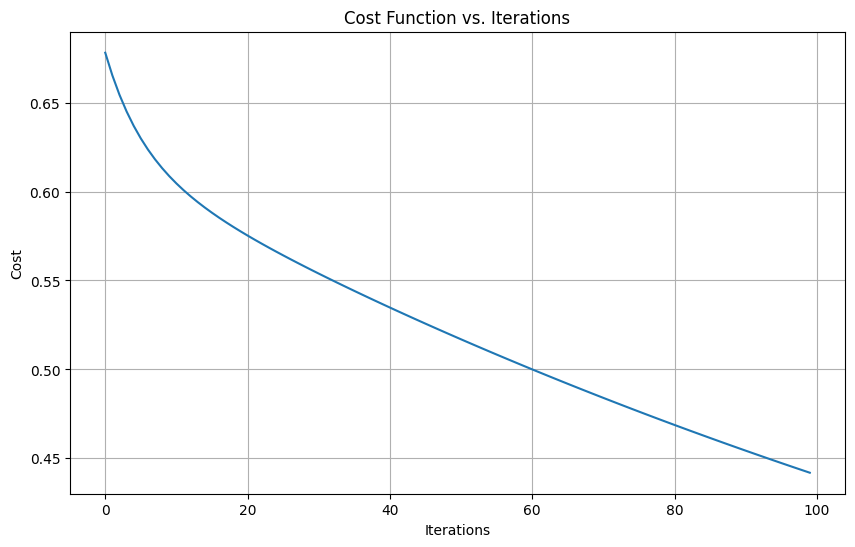

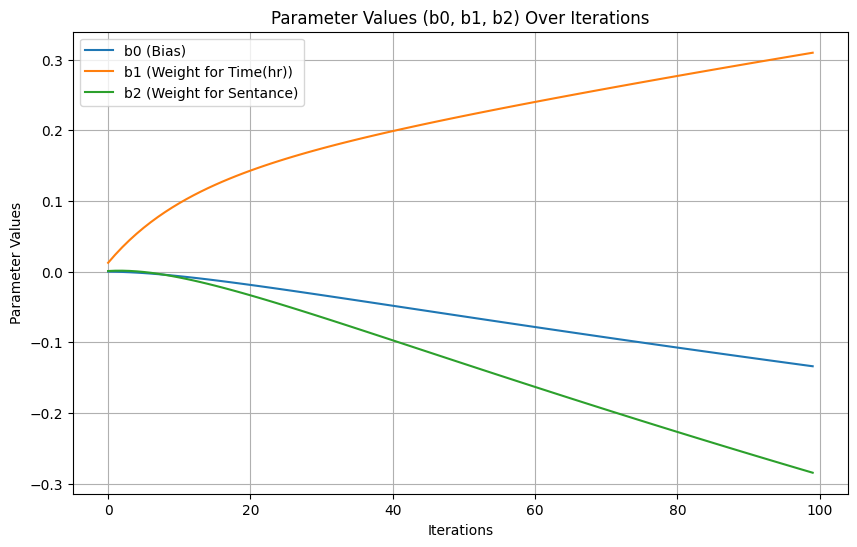

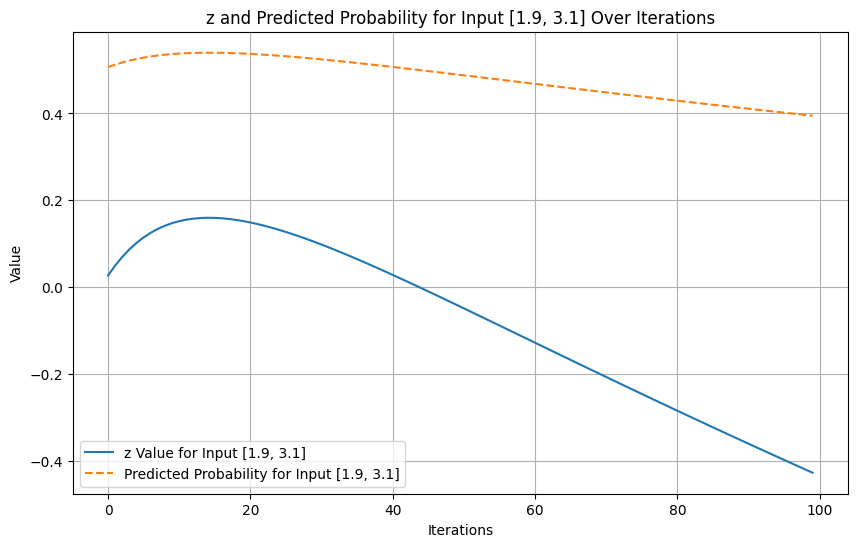

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (log-loss / cross-entropy)
def cost_function(X, y, w, b):
    m = len(y)
    z = np.dot(X, w) + b
    h = sigmoid(z)
    cost = - (1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent to optimize weights and bias
def gradient_descent(X, y, w, b, alpha, iterations, input_values):
    m = len(y)
    cost_history = []
    b0_history, b1_history, b2_history = [], [], []
    z_history, prob_history = [], []
    
    for i in range(iterations):
        z = np.dot(X, w) + b
        h = sigmoid(z)
        
        # Compute gradients
        dw = (1/m) * np.dot(X.T, (h - y))
        db = (1/m) * np.sum(h - y)
        
        # Update parameters
        w -= alpha * dw
        b -= alpha * db
        
        # Store the cost and parameters at each iteration
        cost = cost_function(X, y, w, b)
        cost_history.append(cost)
        b0_history.append(b)
        b1_history.append(w[0])
        b2_history.append(w[1])
        
        # Compute z and probability for input [1.9, 3.1] at each iteration
        z_input = np.dot(input_values, w) + b
        prob_input = sigmoid(z_input)
        z_history.append(z_input)
        prob_history.append(prob_input)
        
        # Print the parameters, z, and probability at every iteration
        print(f"Iteration {i + 1}:")
        print(f"  b0 = {b}, b1 = {w[0]}, b2 = {w[1]}")
        print(f"  z for input [1.9, 3.1] = {z_input}")
        print(f"  Probability for input [1.9, 3.1] = {prob_input}")
        print(f"  Cost = {cost}")
        print('-' * 50)
    
    return w, b, cost_history, b0_history, b1_history, b2_history, z_history, prob_history

# Given dataset
data = {
    'Time(hr)': [2.7, 1.4, 3.3, 1.3 , 3, 7.6 , 5.9 , 6.9, 8.6 , 7.7],
    'Sentance': [2.5 , 2.3, 2.4 , 1.8 , 3 , 2.7 , 2.2 , 1.8 , 3.5 , 3.5],
    'Article type': [0,0,0,0,0,1,1,1,1,1]
}

# Prepare data
X = np.array(list(zip(data['Time(hr)'], data['Sentance'])))  # Feature matrix
y = np.array(data['Article type'])  # Target variable
input_values = np.array([1.9, 3.1])  # Input values to predict probability

# Initialize weights and bias
w = np.zeros(X.shape[1])  # Two weights for two features
b = 0  # Bias term

# Set parameters for gradient descent
alpha = 0.01  # Learning rate
iterations = 100  # Number of iterations

# Run gradient descent
w_opt, b_opt, cost_history, b0_history, b1_history, b2_history, z_history, prob_history = gradient_descent(
    X, y, w, b, alpha, iterations, input_values
)

# Plot cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations')
plt.grid(True)
plt.show()

# Plot values of b0, b1, b2 over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), b0_history, label='b0 (Bias)')
plt.plot(range(iterations), b1_history, label='b1 (Weight for Time(hr))')
plt.plot(range(iterations), b2_history, label='b2 (Weight for Sentance)')
plt.xlabel('Iterations')
plt.ylabel('Parameter Values')
plt.title('Parameter Values (b0, b1, b2) Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Plot z and probability for input [1.9, 3.1] over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), z_history, label='z Value for Input [1.9, 3.1]')
plt.plot(range(iterations), prob_history, label='Predicted Probability for Input [1.9, 3.1]', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('z and Predicted Probability for Input [1.9, 3.1] Over Iterations')
plt.legend()
plt.grid(True)
plt.show()
